In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import adjustText as aT

## Descriptive statistics of data on maps

In [2]:
df = pd.read_excel("df_final.xlsx")

In [3]:
df.District = df.District.apply(lambda x: x.lstrip())

In [4]:
df.loc[df.District == "Metro Wilanowska", "District"] = "Mokotów"

#### Creating dependent variable price per sqm

In [6]:
df["Price_per_sqm"] = df["Total_price"]/df["Powierzchnia"]

In [8]:
geo_df = gpd.read_file(r"C:\Users\grzeg\Desktop\studia\Data Science\2 rok\semestr 2\Spatial\Housing-Prices-Spatial-econometrics\shapefile\dzielnice_Warszawy.shp", encoding = 'utf-8')

In [9]:
geo_df.columns = ["District", "geometry"]

In [10]:
grouped_stats = df.groupby("District").agg({"Price_per_sqm":{"Mean_price_sqm": "mean", "Max_price_sqm":"max"}, 
                           "Powierzchnia": {"Mean_sqm":"mean"}, 
                           "Rok budowy": {"Median_construction_year":"median"}})

D:\Users\grzeg\Anaconda3\lib\site-packages\pandas\core\groupby\generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [11]:
grouped_stats["District"] = grouped_stats.index
grouped_stats.reset_index(inplace = True, drop = True)

In [12]:
grouped_stats = geo_df.merge(grouped_stats, on = "District")
grouped_stats.columns = ["District", "geometry", "Mean_price_sqm", "Max_price_sqm", "Mean_sqm", "Median_construction_year"]

D:\Users\grzeg\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:522: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


In [61]:
grouped_stats.Mean_price_sqm = grouped_stats.Mean_price_sqm.astype("int")
grouped_stats.Max_price_sqm = grouped_stats.Max_price_sqm.astype("int")

In [62]:
grouped_stats["center"] = grouped_stats.geometry.centroid

In [63]:
grouped_stats_points = grouped_stats.copy()
grouped_stats_points.set_geometry("center", inplace = True)

### Mean price

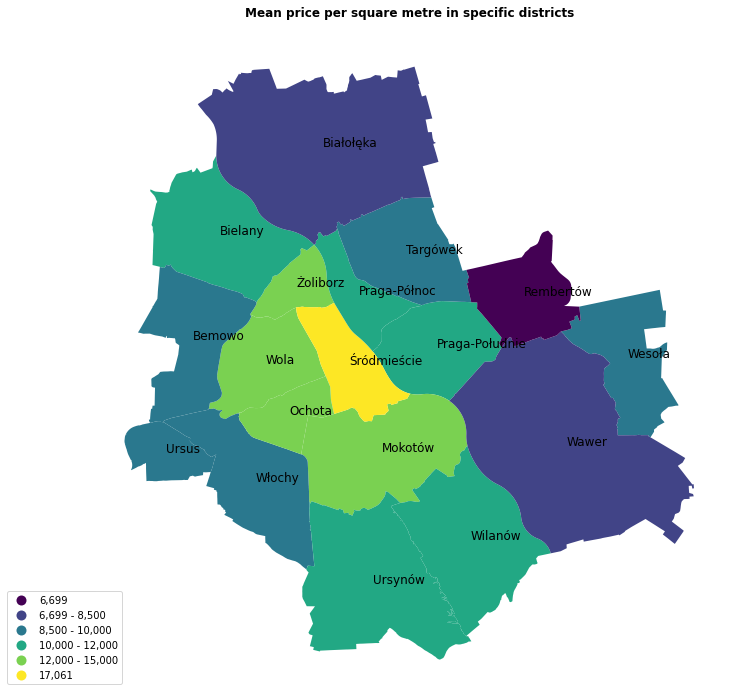

In [107]:
fig, ax = plt.subplots(figsize = (12, 12))
grouped_stats.plot(column = "Mean_price_sqm", 
                    legend = True,  
                    scheme='user_defined', 
                    classification_kwds={'bins':[6699, 8500, 10000, 12000, 15000]},
                   
                    legend_kwds={'loc':'lower right', 
                   'bbox_to_anchor': (0.05, 0)},
                    ax = ax)

ax.spines["top"].set_color("None")
ax.spines["right"].set_color("None")
ax.spines["left"].set_color("None")
ax.spines["bottom"].set_color("None")

ax.set_yticks([])
ax.set_xticks([])



for x, y, label in zip(grouped_stats_points.geometry.x, grouped_stats_points.geometry.y, grouped_stats_points["District"]):
    plt.text(x, y, label, fontsize = 12)

    

ax.set_title("Mean price per square metre in specific districts", 
            fontdict = {'fontsize': 12, 
                    'fontweight': 'bold'}, pad = 20)


## Formatting legend labels

legend = ax.get_legend()

for num, lbl in enumerate(legend.get_texts()):

    if num == len(legend.texts) - 1:
        new_text = grouped_stats.Mean_price_sqm.max()
        new_text = f'{new_text:,.0f}'
        lbl.set_text(new_text)
    
    elif num == 0:
        
        new_text = grouped_stats.Mean_price_sqm.min()
        new_text = f'{new_text:,.0f}'
        lbl.set_text(new_text)
        
        
    else:
        label_text = lbl.get_text()
        lower = label_text.split()[0]
        upper = label_text.split()[2]
        new_text = f'{float(lower):,.0f} - {float(upper):,.0f}'
        lbl.set_text(new_text)


### Max price

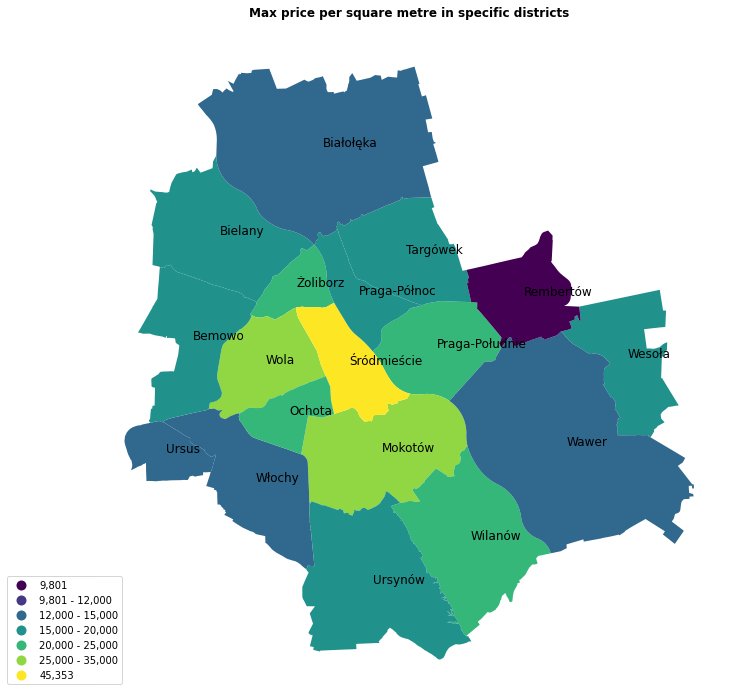

In [111]:
fig, ax = plt.subplots(figsize = (12, 12))
grouped_stats.plot(column = "Max_price_sqm", 
                    legend = True,  
                    scheme='user_defined',
                    classification_kwds = {'bins': [9801,12000,15000,20000,25000, 35000]},
                    legend_kwds={'loc':'lower right', 
                   'bbox_to_anchor': (0.05, 0)},
                    ax = ax)

ax.spines["top"].set_color("None")
ax.spines["right"].set_color("None")
ax.spines["left"].set_color("None")
ax.spines["bottom"].set_color("None")

ax.set_yticks([])
ax.set_xticks([])

for x, y, label in zip(grouped_stats_points.geometry.x, grouped_stats_points.geometry.y, grouped_stats_points["District"]):
    plt.text(x, y, label, fontsize = 12)


ax.set_title("Max price per square metre in specific districts", 
            fontdict = {'fontsize': 12, 
                    'fontweight': 'bold'}, pad = 20)
legend = ax.get_legend()

for num, lbl in enumerate(legend.get_texts()):

    if num == len(legend.texts) - 1:
        new_text = grouped_stats.Max_price_sqm.max()
        new_text = f'{new_text:,.0f}'
        lbl.set_text(new_text)
    
    elif num == 0:
        
        new_text = grouped_stats.Max_price_sqm.min()
        new_text = f'{new_text:,.0f}'
        lbl.set_text(new_text)
        
        
    else:
        label_text = lbl.get_text()
        lower = label_text.split()[0]
        upper = label_text.split()[2]
        new_text = f'{float(lower):,.0f} - {float(upper):,.0f}'
        lbl.set_text(new_text)




### Mean sqm

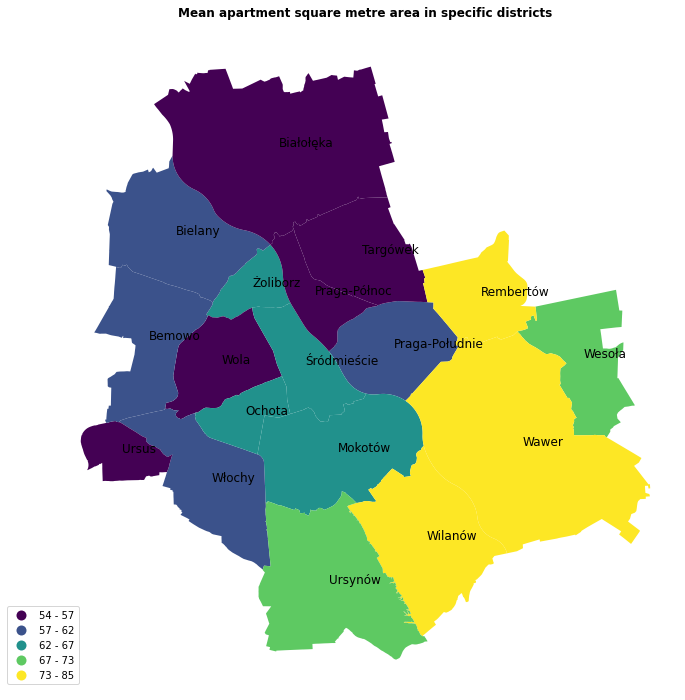

In [115]:
fig, ax = plt.subplots(figsize = (12, 12))
grouped_stats.plot(column = "Mean_sqm", 
                    legend = True,  
                    scheme='FisherJenks',
                    legend_kwds={'loc':'lower right', 
                   'bbox_to_anchor': (0.05, 0)},
                    ax = ax)

ax.spines["top"].set_color("None")
ax.spines["right"].set_color("None")
ax.spines["left"].set_color("None")
ax.spines["bottom"].set_color("None")

ax.set_yticks([])
ax.set_xticks([])

for x, y, label in zip(grouped_stats_points.geometry.x, grouped_stats_points.geometry.y, grouped_stats_points["District"]):
    plt.text(x, y, label, fontsize = 12)


ax.set_title("Mean apartment square metre area in specific districts", 
            fontdict = {'fontsize': 12, 
                    'fontweight': 'bold'}, pad = 20)
legend = ax.get_legend()

for num, lbl in enumerate(legend.get_texts()):

    label_text = lbl.get_text()
    lower = label_text.split()[0]
    upper = label_text.split()[2]
    new_text = f'{float(lower):,.0f} - {float(upper):,.0f}'
    lbl.set_text(new_text)


### Median year of construction

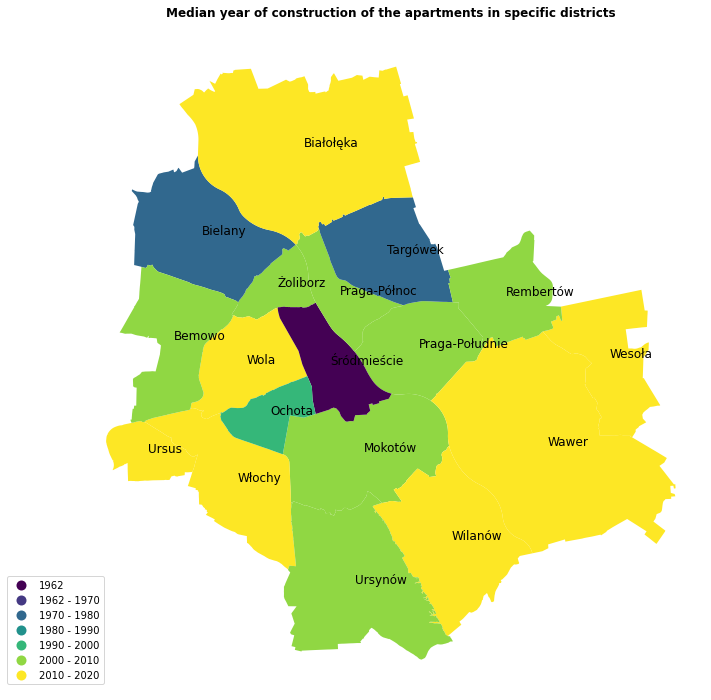

In [124]:
fig, ax = plt.subplots(figsize = (12, 12))
grouped_stats.plot(column = "Median_construction_year",
                    legend = True,  
                    scheme='user_defined',
                    classification_kwds = {'bins': [1962, 1970, 1980, 1990, 2000, 2010, 2020]},
                    legend_kwds={'loc':'lower right', 
                   'bbox_to_anchor': (0.05, 0)},
                    ax = ax)

ax.spines["top"].set_color("None")
ax.spines["right"].set_color("None")
ax.spines["left"].set_color("None")
ax.spines["bottom"].set_color("None")

ax.set_yticks([])
ax.set_xticks([])

for x, y, label in zip(grouped_stats_points.geometry.x, grouped_stats_points.geometry.y, grouped_stats_points["District"]):
    plt.text(x, y, label, fontsize = 12)


ax.set_title("Median year of construction of the apartments in specific districts", 
            fontdict = {'fontsize': 12, 
                    'fontweight': 'bold'}, pad = 20)
legend = ax.get_legend()

for num, lbl in enumerate(legend.get_texts()):

    label_text = lbl.get_text()
    lower = label_text.split()[0]
    upper = label_text.split()[2]
    
    if num == 0:
        new_text = f'{int(float(lower))}'
        
    else:
        new_text = f'{int(float(lower))} - {int(float(upper))}'
    lbl.set_text(new_text)

After the overview of the data from otodom we can introduce some other variables, which might be helpful in explaining apartment prices in Warsaw. This measures are syntetic (which means they were obtained on the basis of multiple factors) and are calculated on district level. https://warszawa.stat.gov.pl/download/gfx/warszawa/pl/defaultaktualnosci/847/1/2/1/ranking_dzielnic_warszawy_pod_wzgledem_atrakcyjnosci_warunkow_zycia_2017.pdf 

The measures are:
* Life quality
* Family_friendliness
* Single people friendliness
* Senior people friendliness

In general, for each variable the higher its value the better. The maps below show the districts with their score from this categories. The higher the score, the better

In [197]:
dzielnice_dane = pd.read_excel(r"C:\Users\grzeg\Desktop\studia\Data Science\2 rok\semestr 2\Spatial\Housing-Prices-Spatial-econometrics\dodatkowe_dane\dzielnice_dane_ogolne_final.xlsx", 
                               sheet_name= "Arkusz1")

In [198]:
dzielnice_dane = geo_df.merge(dzielnice_dane, on = "District")

In [200]:
def life_quality_plot(measure, ax):
    
    plt.figure(figsize = (4,4))
    dzielnice_dane.plot(column = measure,
                        legend = True,  
                        scheme='FisherJenks',
                        
                        ax = ax)

    ax.spines["top"].set_color("None")
    ax.spines["right"].set_color("None")
    ax.spines["left"].set_color("None")
    ax.spines["bottom"].set_color("None")

    ax.set_yticks([])
    ax.set_xticks([])


    ax.set_title("Synthetic {} in specific districts".format(measure), 
                fontdict = {'fontsize': 12, 
                        'fontweight': 'bold'}, pad = 20)
    legend = ax.get_legend()

    for num, lbl in enumerate(legend.get_texts()):

        if num == len(legend.texts) - 1:
            new_text = dzielnice_dane[measure].max()
            new_text = f'{new_text:,.2f}'
            lbl.set_text(new_text)

        elif num == 0:

            new_text = dzielnice_dane[measure].min()
            new_text = f'{new_text:,.2f}'
            lbl.set_text(new_text)


        else:
            label_text = lbl.get_text()
            lower = label_text.split()[0]
            upper = label_text.split()[2]
            new_text = f'{float(lower):,.2f} - {float(upper):,.2f}'
            lbl.set_text(new_text)
        

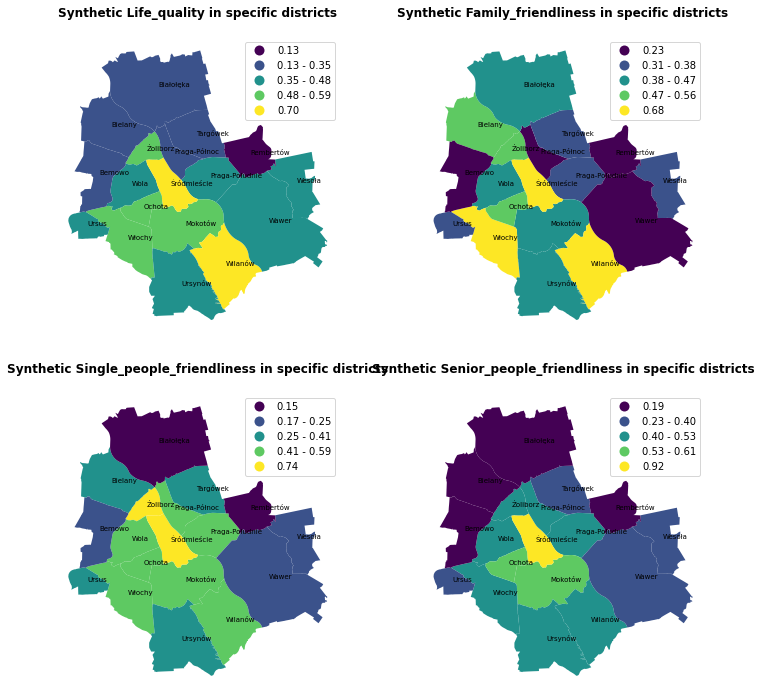

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

<Figure size 288x288 with 0 Axes>

In [201]:
fig, ax = plt.subplots(2,2, figsize = (12,12))
# print(dzielnice_dane.iloc[:,3:].columns[0])

life_quality_plot(dzielnice_dane.iloc[:,4:].columns[0], ax[0,0])
for x, y, label in zip(grouped_stats_points.geometry.x, grouped_stats_points.geometry.y, grouped_stats_points["District"]):
    ax[0,0].text(x, y, label, fontsize = 7)

    
life_quality_plot(dzielnice_dane.iloc[:,4:].columns[1], ax[0,1])
for x, y, label in zip(grouped_stats_points.geometry.x, grouped_stats_points.geometry.y, grouped_stats_points["District"]):
    ax[0,1].text(x, y, label, fontsize = 7)

    
life_quality_plot(dzielnice_dane.iloc[:,4:].columns[2], ax[1,0])
for x, y, label in zip(grouped_stats_points.geometry.x, grouped_stats_points.geometry.y, grouped_stats_points["District"]):
    ax[1,0].text(x, y, label, fontsize = 7)
    
    
life_quality_plot(dzielnice_dane.iloc[:,4:].columns[3], ax[1,1])
for x, y, label in zip(grouped_stats_points.geometry.x, grouped_stats_points.geometry.y, grouped_stats_points["District"]):
    ax[1,1].text(x, y, label, fontsize = 7)

#### District level variables are merged with general dataframe

In [209]:
df = df.merge(dzielnice_dane, on = "District", how = "left")

In [215]:
df = df.loc[df["geometry"].isna() == False]
df.drop(columns = ["geometry"], inplace = True)

In [218]:
df.reset_index(inplace = True, drop = True)

In [224]:
df.to_excel("df_final_v2.xlsx", index = False)